# Data Preprocessing and Early EDA

This is the early stage of the project's process, and I will mostly deal with the structure of the data, analyze irregularities, anomalies, and make decisions aligned with the project's goal.

This stage includes Data Preprocessing and basic Exploratory Data Analysis (EDA) with the following structure:

<ul>
  <li>1. Imports</li>
  <li>2. Data</li>
  <li>3. Early EDA and Data Cleaning </li>
    <ul>
      <li>3.1 Missing values</li>
      <li>3.2 Duplicate rows</li>
      <li>3.3 Outliers</li>
      <li>3.4 Mismatched data types</li>
      <li>3.5 Structural errors</li>
    </ul>
</ul>

# 1. Imports

In [ ]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster')

: 

# 2. Data

In [2]:
#loading data into a pandas dataframe
movies = pd.read_csv('data/movie_data.csv')

In [3]:
#inspecting the first five rows
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Basic Data Exploration and Preparation

- **Number of entries** : There are a total of 5043 entries. 
- **Number of features and their types**: There are a total of 26 features with types: float64(12), int64(3), object(11)
- **Scale**: Scales differ greatly, namely *gross* and *budget* in comparison to other features.
- **Missing values:** total of 2685 missing values, highest % of missing values are the target value '*gross*' 17.52%, followed by '*budget*' 9.75%.
- **Duplicate rows**: There are total of 247 duplicated rows.
- **Categorical features**: color, director_name, actor_1_name, actor_2_name, actor_3_name, genres, movie_title, plot_keywords, language, country, content_rating
- **Numerical features**: num_critic_reviews, duration, director_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, gross, num_users_voted, cast_total_facebook_likes, num_user_reviews, budget, title_year, movie_score, aspect_ratio, movie_facebook_likes

In [5]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', movies.isnull().values.sum())
print('Percent of missing values per feature: ') 
movies.isnull().sum() * 100 / len(movies)

Number of missing values:  2685
Percent of missing values per feature: 


color                         0.376760
director_name                 2.062265
num_critic_reviews            0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_users_voted               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
plot_keywords                 3.033908
num_user_reviews              0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
movie_score                   0.000000
aspect_ratio                  6.523895
movie_facebook_likes     

<AxesSubplot:>

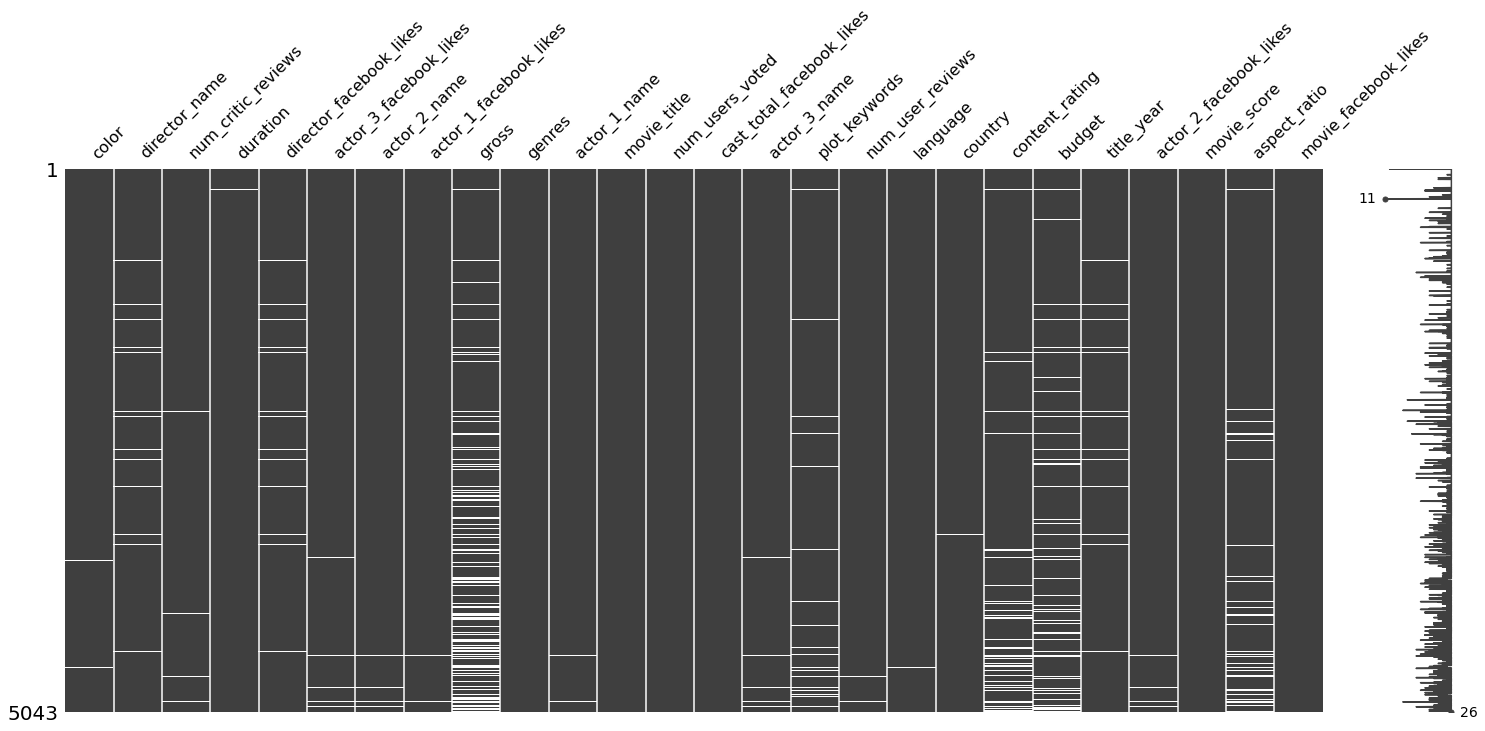

In [6]:
#matrix map of missing values
msno.matrix(movies)

<AxesSubplot:>

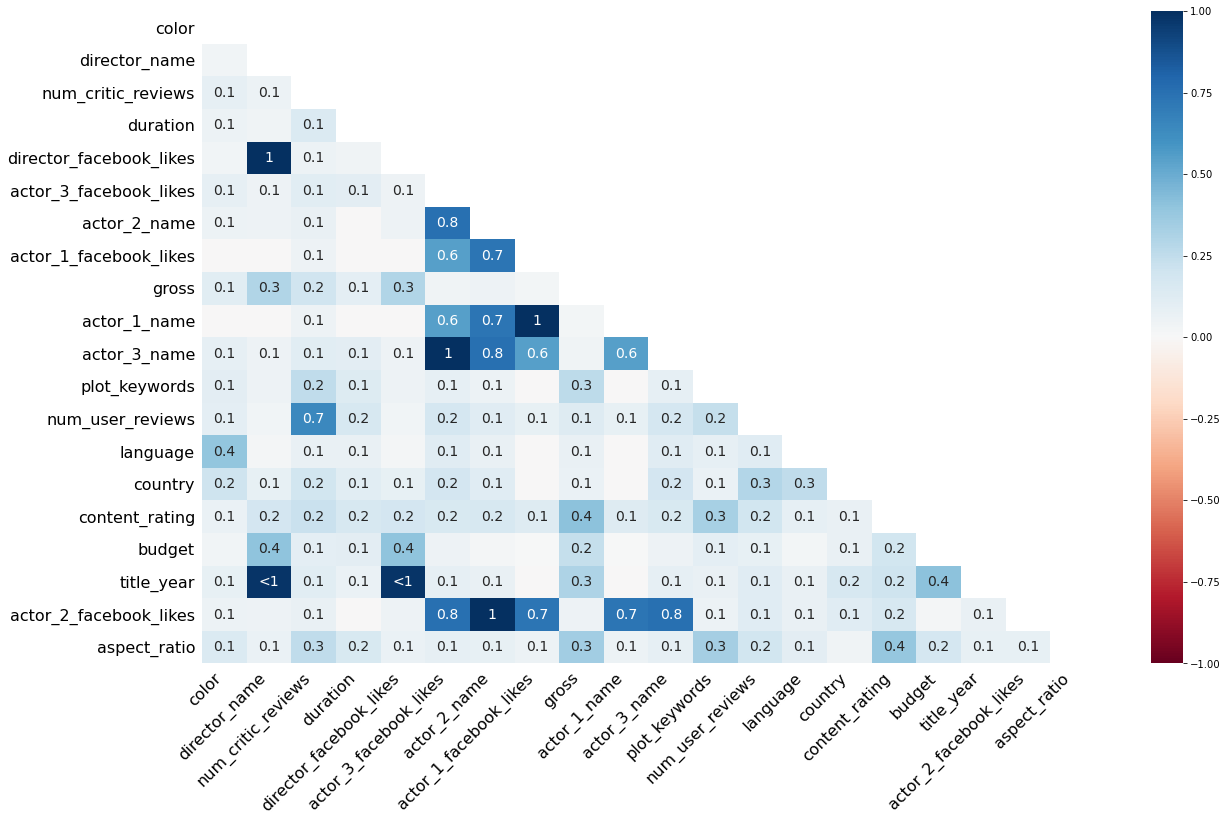

In [7]:
#heatmap of missing values
msno.heatmap(movies)

In [8]:
#removing missing values
movies.dropna(inplace=True)

In [9]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [10]:
print('Number of missing values: ', movies.isnull().values.sum())
print('Data lenght: ', len(movies))

Number of missing values:  0
Data lenght:  3761


**Duplicate values**

There are total of 247 duplicated rows.

**Action taken**

Duplicate rows will be removed on the movie_title column.

In [11]:
#removing duplicate rows based on the 'movie_title' column
movies.drop_duplicates(subset=['movie_title'], keep=False, inplace=True)

In [12]:
print('Data length: ', len(movies))

Data length:  3565


In [13]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


**Exploring numerical features**

In [14]:
#separating numerical features from the categorical
num_movies = movies.select_dtypes(include=['float64', 'int64'])

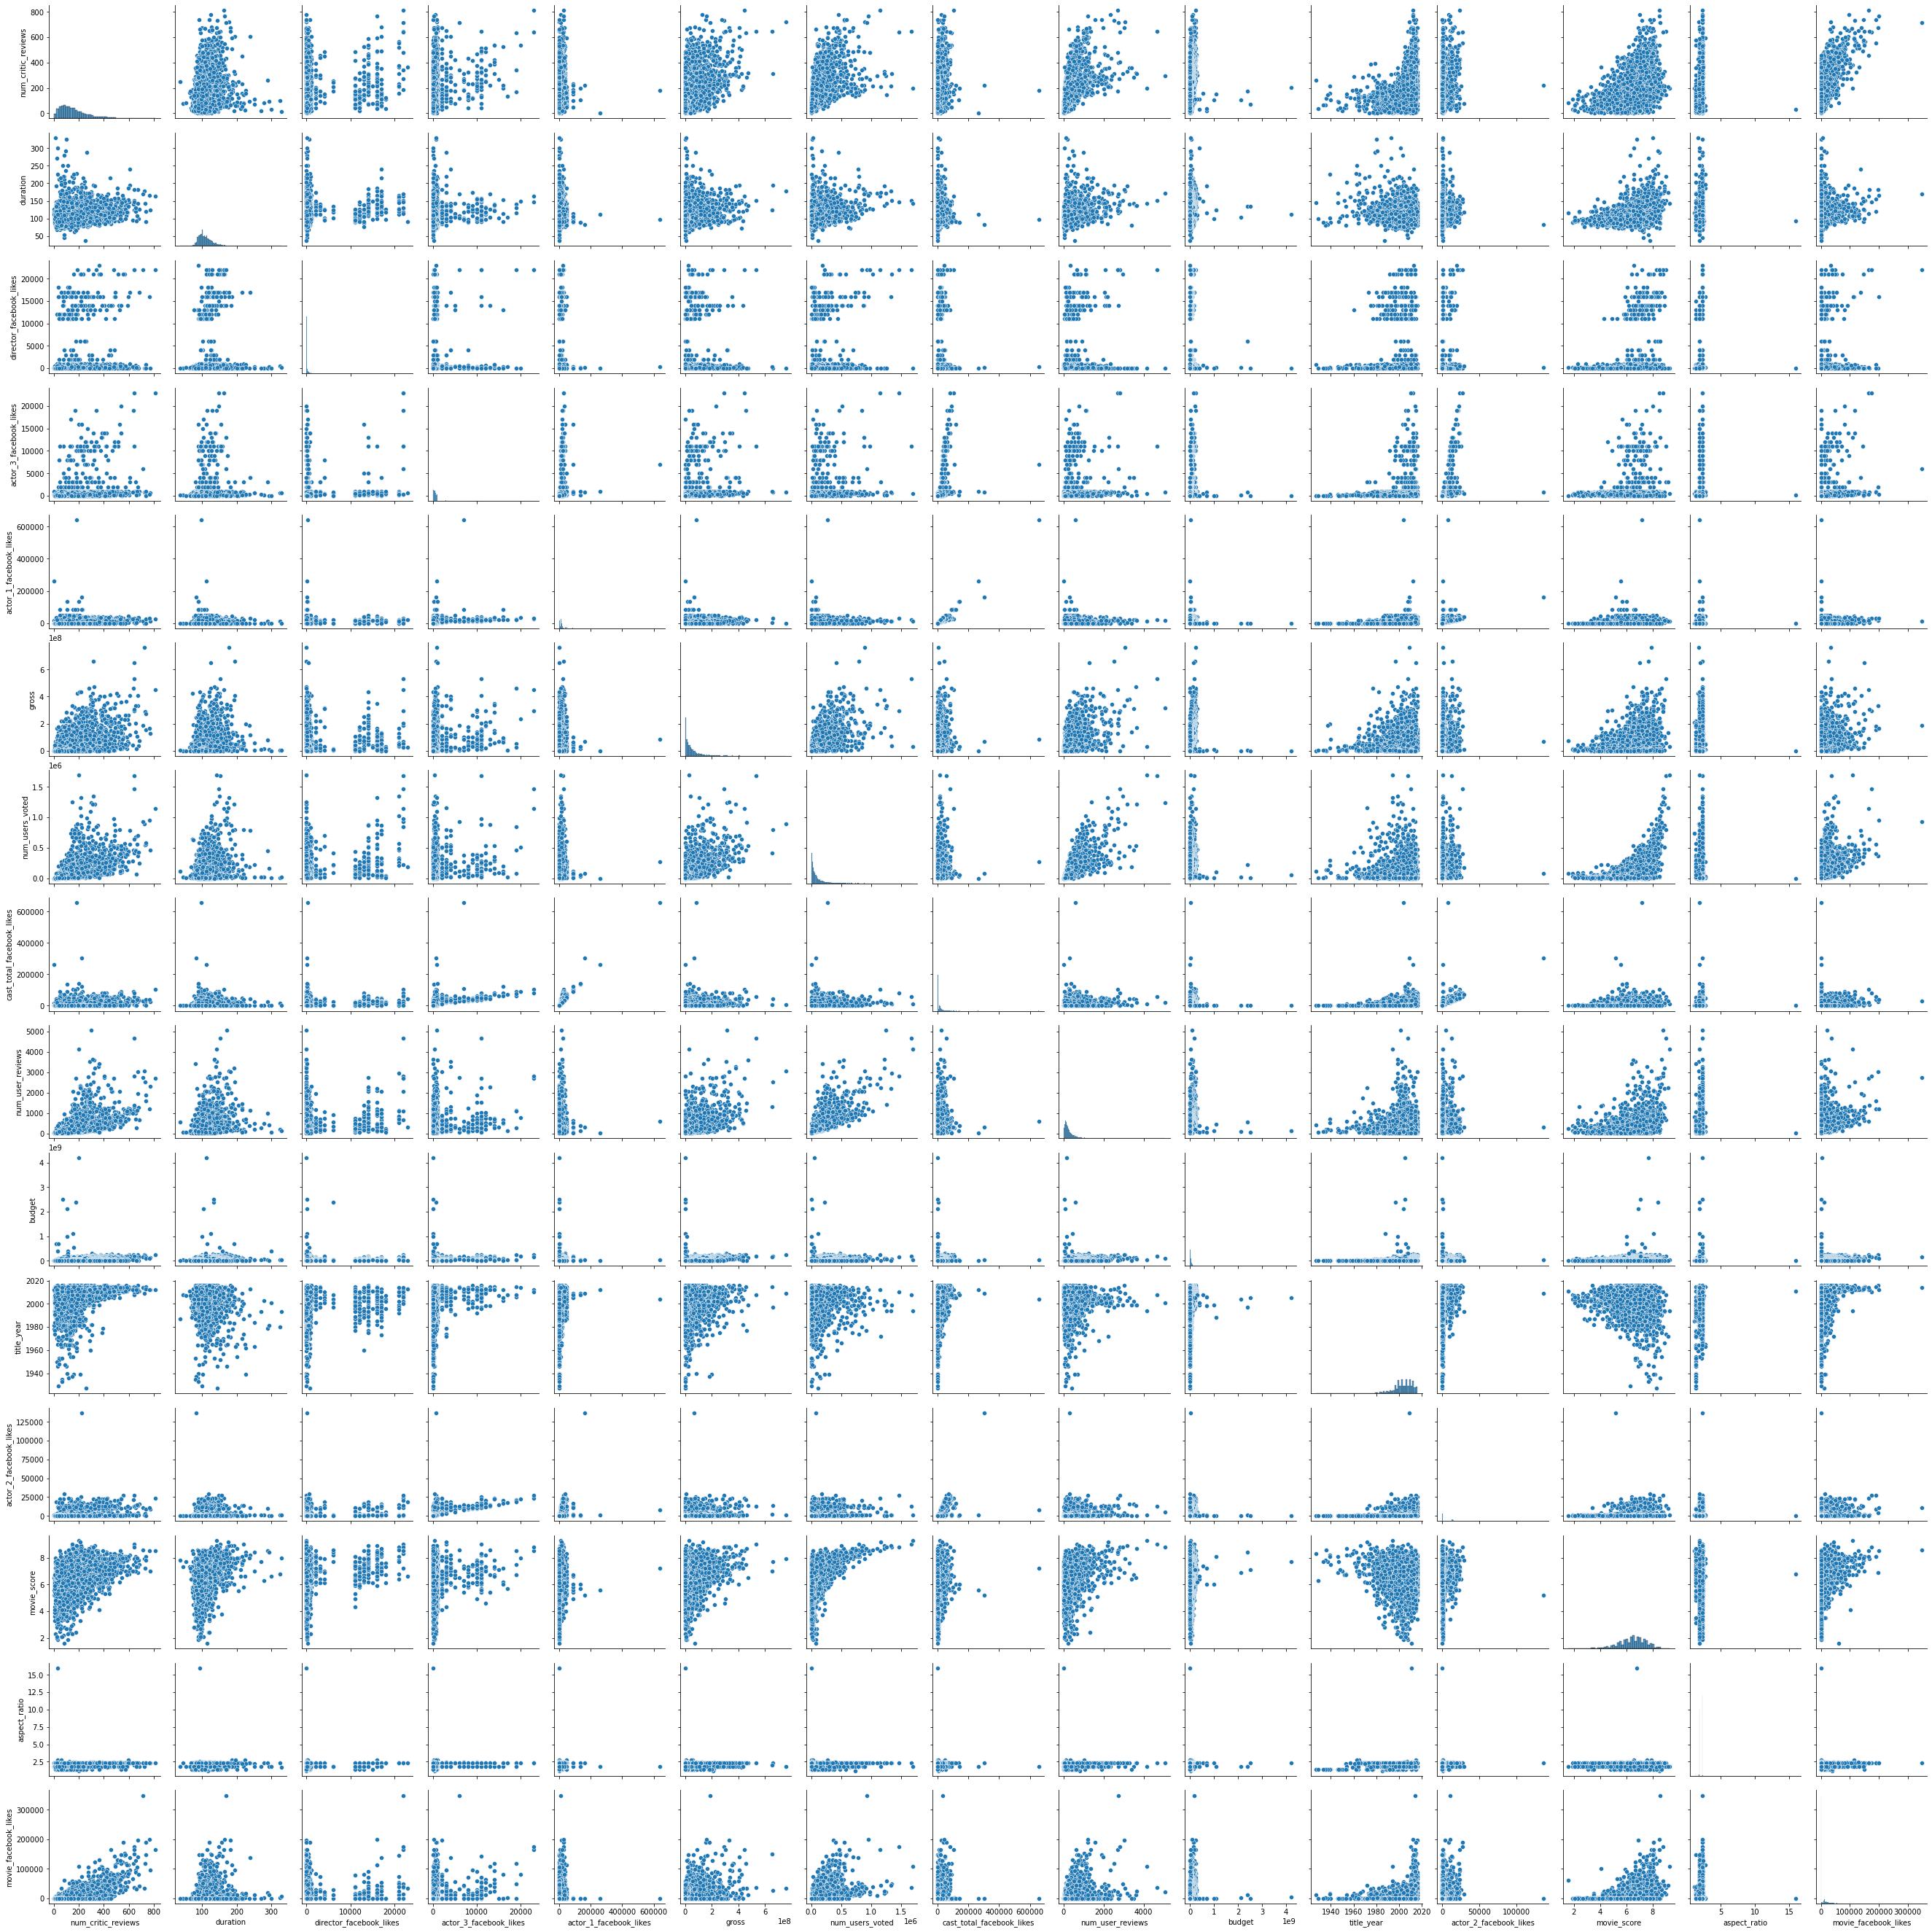

In [15]:
#visualizing numerical features using pairplot
sns.pairplot(num_movies)

In [16]:
num_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_reviews         3565 non-null   float64
 1   duration                   3565 non-null   float64
 2   director_facebook_likes    3565 non-null   float64
 3   actor_3_facebook_likes     3565 non-null   float64
 4   actor_1_facebook_likes     3565 non-null   float64
 5   gross                      3565 non-null   float64
 6   num_users_voted            3565 non-null   int64  
 7   cast_total_facebook_likes  3565 non-null   int64  
 8   num_user_reviews           3565 non-null   float64
 9   budget                     3565 non-null   float64
 10  title_year                 3565 non-null   float64
 11  actor_2_facebook_likes     3565 non-null   float64
 12  movie_score                3565 non-null   float64
 13  aspect_ratio               3565 non-null   float

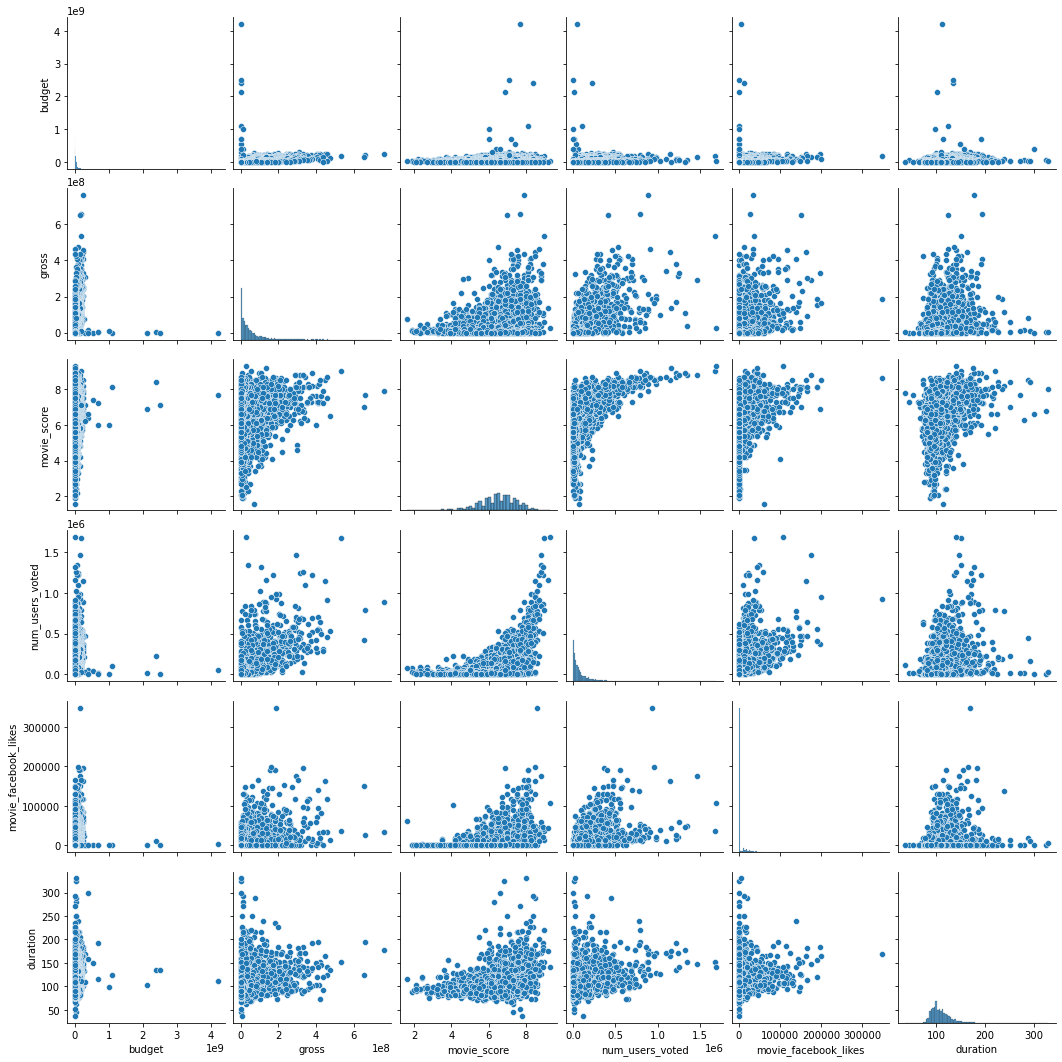

In [17]:
sns.pairplot(num_movies[['budget', 'gross', 'movie_score', 'num_users_voted', 'movie_facebook_likes', 'duration']])

**Converting budget and gross to a more interpretable value expressed in millions**

As gross and budget are both expressed in 6 and more digits, for the sake of interpretability and visualization, we will convert the values to million, and create two new features.

In [18]:
#converting budget to million
movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

#converting gross to million
movies['gross ($) millions'] = (movies['gross'].astype(float)/1000000).round(2)
movies.head(1)

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51


In [19]:
#converting gross to million
movies['num_voted_mill'] = (movies['num_users_voted'].astype(float)/1000000).round(2)
movies.head(1)

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51,0.89


**Identifying anomalies**

An obvious outlier in the budget feature was detected, which after further inspection was identified as false.

**Action taken** : The false value was replaced with the appropriate value taken from the IMDB website.

------------------------------------------------------------------------------------------------------------------

Initial exploration identified huge outliers in the budget value, which was identified as a currency from the country of origin. All USA movies appear to have the same curency: US dollar. All non-USA English speaking countries (New Zealand, UK, Australia etc.) appear to have their budgets expressed in US dollars.

**Action taken** : removed all foreign languages, and kept the English language.

<AxesSubplot:xlabel='budget ($) millions', ylabel='Density'>

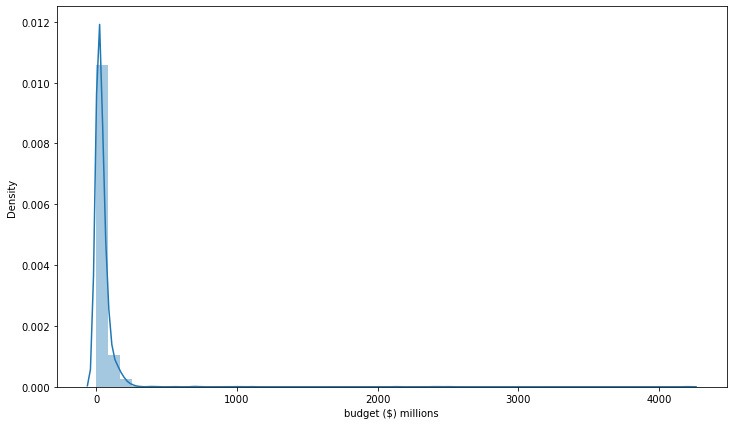

In [20]:
#zooming in on a potential anomaly that was detected in the previous plot concerning the budget feature 
f, ax = plt.subplots(figsize=(12,7))
sns.distplot(movies['budget ($) millions'],ax=ax)

In [21]:
#locating the incorrect value
movies[movies['budget'] == 390000000.0]

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
915,Color,Luc Besson,111.0,158.0,0.0,15.0,David Bailie,51.0,14131298.0,Adventure|Biography|Drama|History|War,...,R,390000000.0,1999.0,40.0,6.4,2.35,0,390.0,14.13,0.06


In [22]:
#removing the invalid budgetvalue and replacing it with the proper one
movies['budget'] = movies['budget'].replace(390000000.0, 60000000.0)

In [23]:
# updating the budget in millions column
movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

<AxesSubplot:xlabel='budget ($) millions', ylabel='Count'>

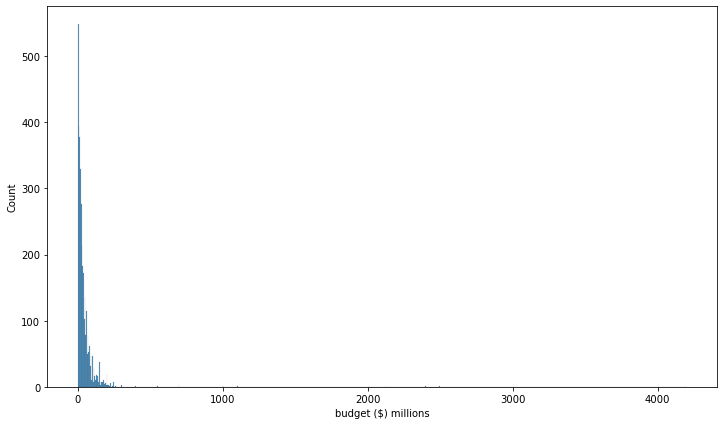

In [24]:
f, ax = plt.subplots(figsize=(12,7))
sns.histplot(movies['budget ($) millions'],ax=ax)

**Mismatched data types**


In [25]:
#exploring outliers and identifying if the currency between gross and budget matches
budget_over_250 = movies[movies['budget ($) millions'] > 250]
budget_over_250[['country', 
                 'language',
                 'movie_title', 
                 'budget ($) millions', 
                 'gross ($) millions']].sort_values('budget ($) millions', ascending=False)

,country,language,movie_title,budget ($) millions,gross ($) millions
3109,South Korea,Korean,Lady Vengeance,4200.00,0.21
2566,Hungary,Hungarian,Fateless,2500.00,0.20
2036,Japan,Japanese,Princess Mononoke,2400.00,2.30
2046,Japan,Japanese,Steamboy,2127.52,0.41
2841,Japan,Japanese,Akira,1100.00,0.44
3398,Japan,Japanese,Godzilla 2000,1000.00,10.04
2610,India,Hindi,Kabhi Alvida Naa Kehna,700.00,3.28
3104,Spain,Spanish,Tango,700.00,1.69
1203,China,Mandarin,Red Cliff,553.63,0.63
2771,Thailand,Thai,The Legend of Suriyothai,400.00,0.45


In [26]:
#keeping only the English speaking movies
movies = movies[movies.language == 'English']

In [27]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51,0.89
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,300.0,309.40,0.47
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,245.0,200.07,0.28
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,250.0,448.13,1.14
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,263.7,73.06,0.21


In [28]:
movies['language'].value_counts()

English    3410
Name: language, dtype: int64

**Exploring categorical features**

Checking for any structural errors, and inconsistencies.

In [29]:
movies['genres'].value_counts()

Comedy|Drama|Romance                           138
Comedy                                         137
Comedy|Drama                                   128
Comedy|Romance                                 127
Drama                                          121
                                              ... 
Action|Adventure|Comedy|Crime|Music|Mystery      1
Action|Biography|Crime|Drama|Thriller            1
Adventure|Comedy|Crime|Drama|Family              1
Action|Biography|Drama|History|War               1
Comedy|Crime|Horror                              1
Name: genres, Length: 713, dtype: int64

In [30]:
movies['plot_keywords'].value_counts()

avatar|future|marine|native|paraplegic                               1
bank|carnival|motorcycle|police|rookie cop                           1
chicago illinois|false identity|femme fatale|new york city|spying    1
army|bomb|dangerous job|death|iraq                                   1
captain|experiment|fire|psychic|secret government agency             1
                                                                    ..
animal experimentation|chimera|island|jungle|mutant                  1
guard|king|murder|musketeer|swordsman                                1
children|court|king|king henry viii|love                             1
advertising|cancer|dog|san francisco california|terminal illness     1
actress name in title|crush|date|four word title|video camera        1
Name: plot_keywords, Length: 3410, dtype: int64

In [31]:
movies['country'].value_counts()

USA               2822
UK                 290
France              69
Germany             65
Canada              56
Australia           34
Spain               14
New Zealand          8
Ireland              7
Japan                6
Italy                5
Denmark              5
Hong Kong            4
South Korea          3
South Africa         3
Czech Republic       2
China                2
Belgium              1
Iceland              1
Thailand             1
Georgia              1
Iran                 1
Official site        1
Greece               1
Hungary              1
Russia               1
Peru                 1
Chile                1
Romania              1
New Line             1
Aruba                1
Poland               1
Name: country, dtype: int64

In [32]:
movies['color'].value_counts()

Color              3304
Black and White     106
Name: color, dtype: int64

In [33]:
movies['content_rating'].value_counts()

R            1534
PG-13        1188
PG            530
G              83
Not Rated      23
Unrated        17
Approved       16
X               7
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64